In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json

In [23]:
kaggle_token = {"username":"kannama07",
                "key":"ed92d26ed5b54a42232d1568ca6ed8c8"
                }

# Create the ~/.kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Save the token file there
with open("/root/.kaggle/kaggle.json", "w") as file:
    json.dump(kaggle_token, file)

!chmod 600 /root/.kaggle/kaggle.json

print("Kaggle authentication setup completed.")

Kaggle authentication setup completed.


In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uraninjo/augmented-alzheimer-mri-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/augmented-alzheimer-mri-dataset


In [25]:
!kaggle datasets download -duraninjo/augmented-alzheimer-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset
License(s): GNU Lesser General Public License 3.0
 99% 375M/380M [00:07<00:00, 42.9MB/s]
100% 380M/380M [00:07<00:00, 55.4MB/s]


In [26]:
import zipfile
# Extract to a folder named "alzheimer"
with zipfile.ZipFile("augmented-alzheimer-mri-dataset.zip", 'r') as zip_ref:
   zip_ref.extractall("alzheimer")
print("Dataset unzipped!")

Dataset unzipped!


In [27]:
alzheimer_classes = os.listdir("/content/alzheimer/AugmentedAlzheimerDataset")
print("Alzheimer classes:", alzheimer_classes)

Alzheimer classes: ['VeryMildDemented', 'MildDemented', 'NonDemented', 'ModerateDemented']


In [28]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [29]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [30]:
 train_generator = train_datagen.flow_from_directory('/content/alzheimer/AugmentedAlzheimerDataset',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
 )

Found 27188 images belonging to 4 classes.


In [31]:
 val_generator = train_datagen.flow_from_directory('/content/alzheimer/AugmentedAlzheimerDataset',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
     )

Found 6796 images belonging to 4 classes.


In [32]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

In [67]:
print("Class indices : ",class_indices)
print("Class names : ",class_names)

Class indices :  {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
Class names :  ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [34]:
 model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(4, activation='softmax')
 ])
 model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,908 (91.20 MB)

 Trainable params: 23,907,908 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
 model.fit(train_generator,epochs=3,validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


850/850 ━━━━━━━━━━━━━━━━━━━━ 63s 66ms/step - accuracy: 0.5268 - loss: 1.2783 - val_accuracy: 0.7649 - val_loss: 0.5540
Epoch 2/3
850/850 ━━━━━━━━━━━━━━━━━━━━ 50s 59ms/step - accuracy: 0.8399 - loss: 0.3878 - val_accuracy: 0.8496 - val_loss: 0.3614
Epoch 3/3
850/850 ━━━━━━━━━━━━━━━━━━━━ 50s 58ms/step - accuracy: 0.9205 - loss: 0.2024 - val_accuracy: 0.8412 - val_loss: 0.4021


In [37]:
# Make sure the previous cell defining and compiling the model has been executed
model.save('/content/drive/MyDrive/alzheimer/Alzheimer_model.h5')

In [38]:
 model = load_model('/content/drive/MyDrive/alzheimer/Alzheimer_model.h5')
 print("Model Loaded")

Model Loaded


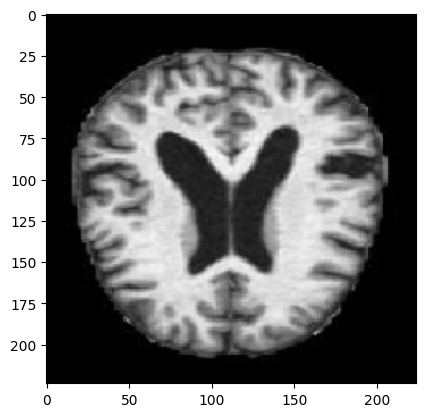

In [83]:
test_image_path="/content/alzheimer/AugmentedAlzheimerDataset/NonDemented/00126637-9d0c-4261-b79d-b6897ba3f4af.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [84]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255.

In [85]:
 prediction = model.predict(img_array)
 ind=np.argmax(prediction)
 prediction=prediction[0][ind]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [86]:
inv_labels = {v: k for k, v in class_indices.items()}

predicted_class = inv_labels[ind]
print(" Predicted class:", predicted_class)
if predicted_class == "NonDemented":
    print(" You do NOT have Alzheimer’s.")
else:
    print(f" Alzheimer’s stage detected: {predicted_class}")

 Predicted class: NonDemented
 You do NOT have Alzheimer’s.
